# Solving the discrete lunar lander problem with Double Deep Q Learning in PyTorch

In [1]:
import os
import math
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## Epsilon decay curve

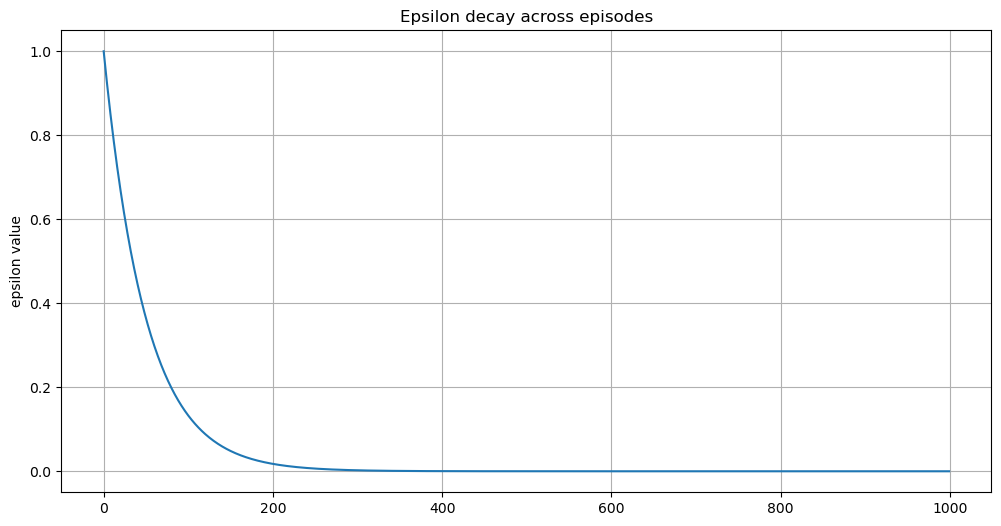

In [2]:
matplotlib.rcParams['figure.figsize'] = [12, 6]

episodes = np.arange(1000)
epsilon_start = 1
epsilon_decay = 0.98
epsilon_min = 0.01
epsilon_episode = epsilon_decay**episodes * epsilon_start
episode_break = np.floor(math.log(epsilon_min / epsilon_start, epsilon_decay))

plt.plot(episodes, epsilon_episode)
plt.grid()
plt.title('Epsilon decay across episodes')
plt.ylabel('epsilon value')
plt.show()

In [3]:
print('Epsilon will reach the minimum of %s starting from episode %i.' % (epsilon_min, episode_break))

Epsilon will reach the minimum of 0.01 starting from episode 227.


## Agent loading

In [4]:
import gymnasium as gym
import LunarLander as ll
import pickle

Environment definition:

In [5]:
env = gym.make('LunarLander-v2')

Loading the trained agent (see the script `training.py` to inspect the code for training):

In [6]:
with open('cache/agent.pickle', 'rb') as file:
    agent = pickle.load(file)

Consider the learning of the agent is incremental, so you can call again `agent.train()` to perform a new training session starting from the last session.

## Training evaluation

### Learning curve

The class `Autopilot` stores the total rewards by episode earned during the training session. By calling the method `train_history()`, you can get the training rewards. Furthermore, you can pass a value (`bin_window`) to reduce the vector in bins and return the mean of rewards within bins. This feature can be used to quickly smooth the learning curve.

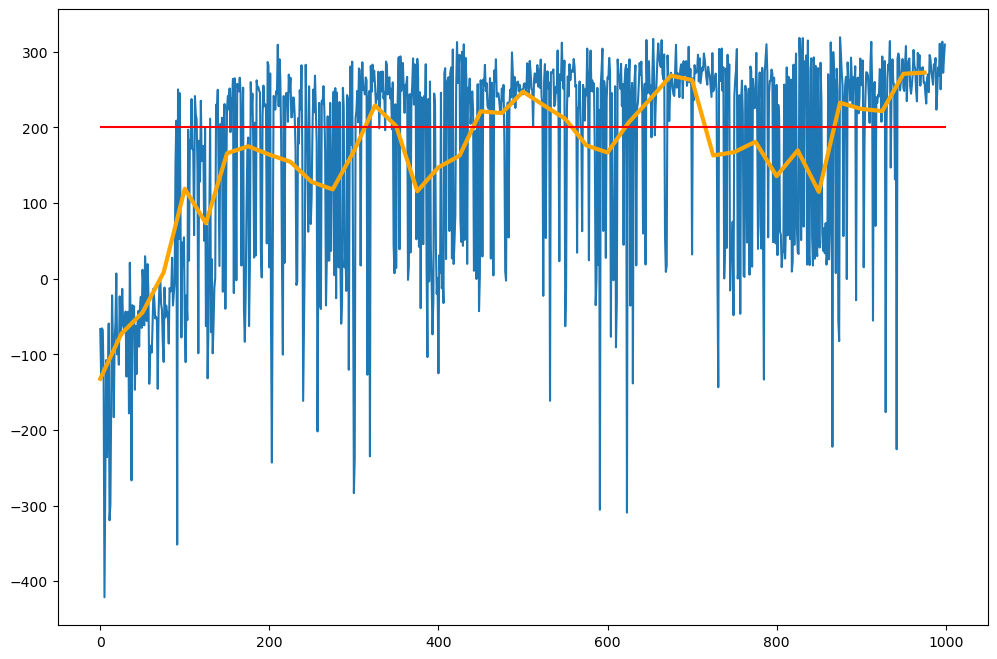

In [7]:
matplotlib.rcParams['figure.figsize'] = [12, 8]

n_episodes = len(agent.train_history())

plt.plot(agent.train_history())

bin_size = 25
bin_avg = agent.train_history(bin_size)
plt.plot(np.array([*range(len(bin_avg))])*bin_size, bin_avg, color='orange', linewidth=3)

plt.hlines(y=200, xmin=0, xmax=n_episodes, color='red')

plt.show()

## Evaluate performances

To evaluate the performances of the agent, the game was run 1000 times.

In [8]:
with open('cache/performances.pickle', 'rb') as file:
    performances = pickle.load(file)

solved = [episode['solved'] for episode in performances]
reward = [episode['reward'] for episode in performances]

print('Proportion of solved:', np.mean(solved))

Proportion of solved: 0.995


Distribution of rewards:

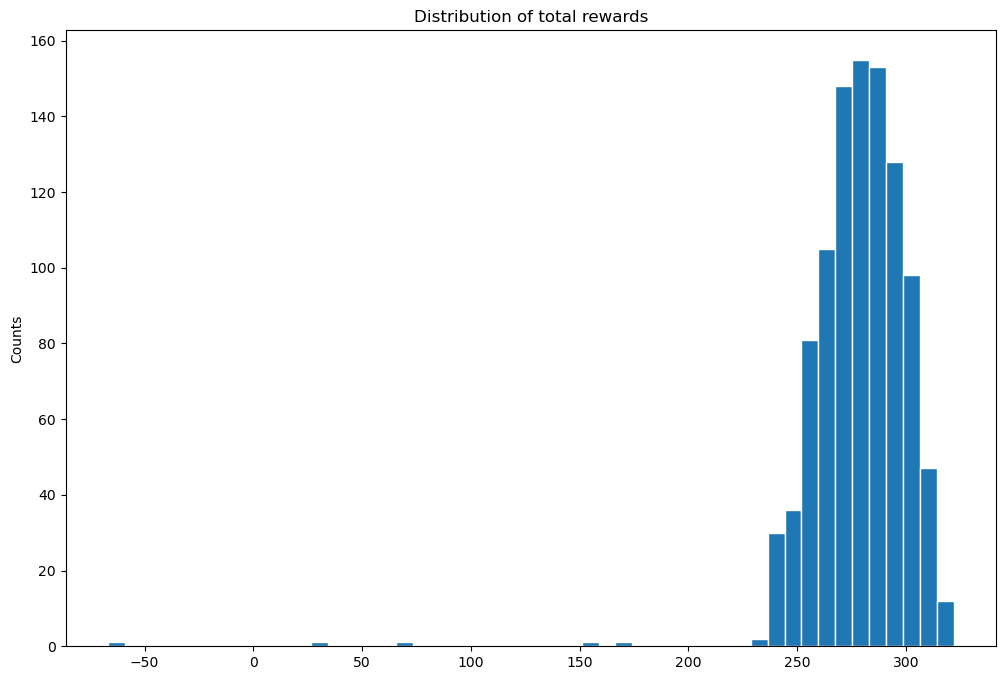

In [9]:
rewards = np.array([episode['reward'] for episode in performances])
plt.hist(rewards, bins=50, density=False, edgecolor='white')
plt.title('Distribution of total rewards')
plt.ylabel('Counts')
plt.show()

In [10]:
print('Mean of total rewards: %.2f' % np.mean(reward) )

Mean of total rewards: 278.57


In [11]:
print('Median of total rewards: %.2f' % np.median(reward) )

Median of total rewards: 280.29


In [12]:
print('The 95%% of total rewards is between %.2f and %.2f' % ( np.quantile(reward, 0.025), np.quantile(reward, 0.975) ) )

The 95% of total rewards is between 242.30 and 311.44
